In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from livelossplot import PlotLossesKeras
import os
import tensorboard

In [3]:
# ✅ 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
# Normalize pixel values (0 to 255 → 0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (28x28 grayscale images → (28,28,1))
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [31]:
# ✅ 2. Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer (10 digits)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
# ✅ 3. Setup Callbacks
# 📉 PlotLossesKeras (for inline plotting in Jupyter)
plot_losses = PlotLossesKeras()  # for plotting losses per epoch
plot_losses2 = PlotLossesKeras(outputs=['MatplotlibPlot'])  # for plotting losses at the end

Unknown IPython mode: PositronShell. Assuming notebook mode.
Unknown IPython mode: PositronShell. Assuming notebook mode.


In [30]:


# 🛑 EarlyStopping (Stop training if validation loss doesn't improve for 5 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 💾 ModelCheckpoint (Save the best model)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# 📊 TensorBoard (for advanced logging & visualization)
log_dir = os.path.join("logs", "mnist_experiment")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

Epoch 1/6
1872/1875 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9363

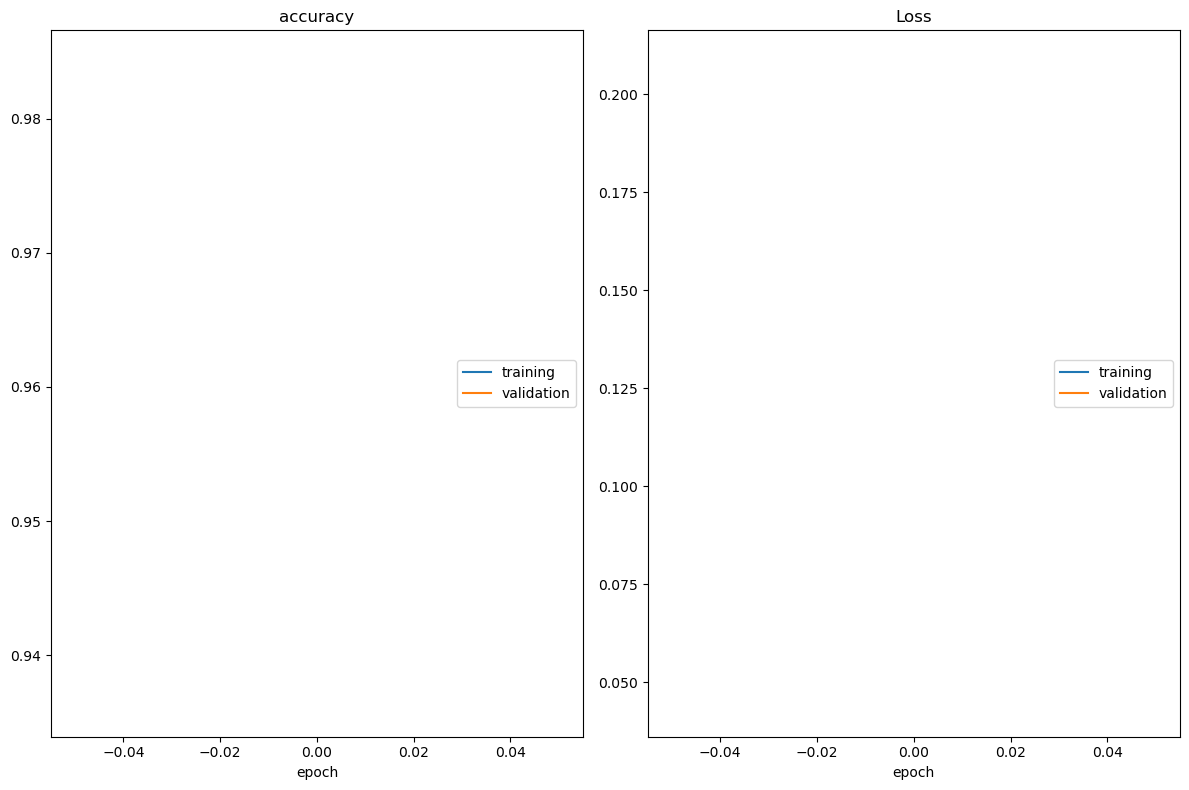

/media/naman/NewVolume/Ubuntu/mytff/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 20s 9ms/step - loss: 0.2082 - accuracy: 0.9363 - val_loss: 0.0443 - val_accuracy: 0.9842
Epoch 2/6
1874/1875 [============================>.] - ETA: 0s - loss: 0.0750 - accuracy: 0.9782

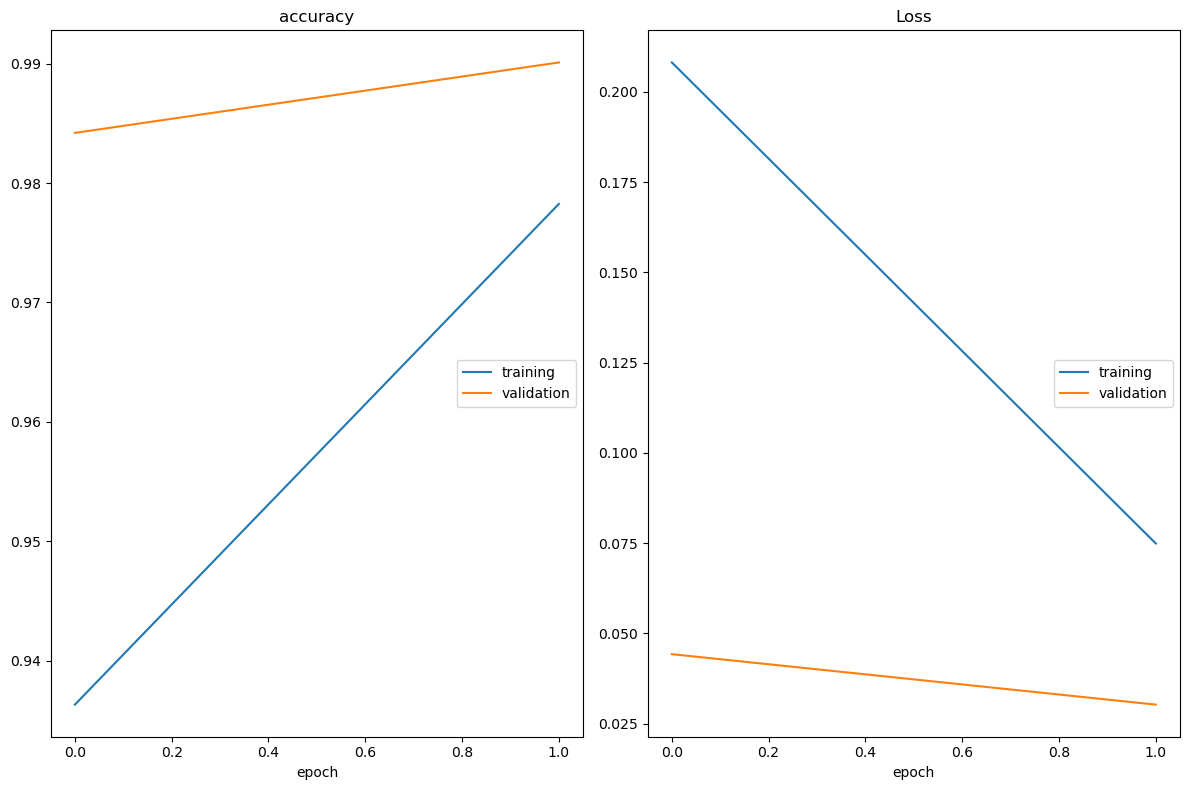

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0303 - val_accuracy: 0.9901
Epoch 3/6
1874/1875 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9832

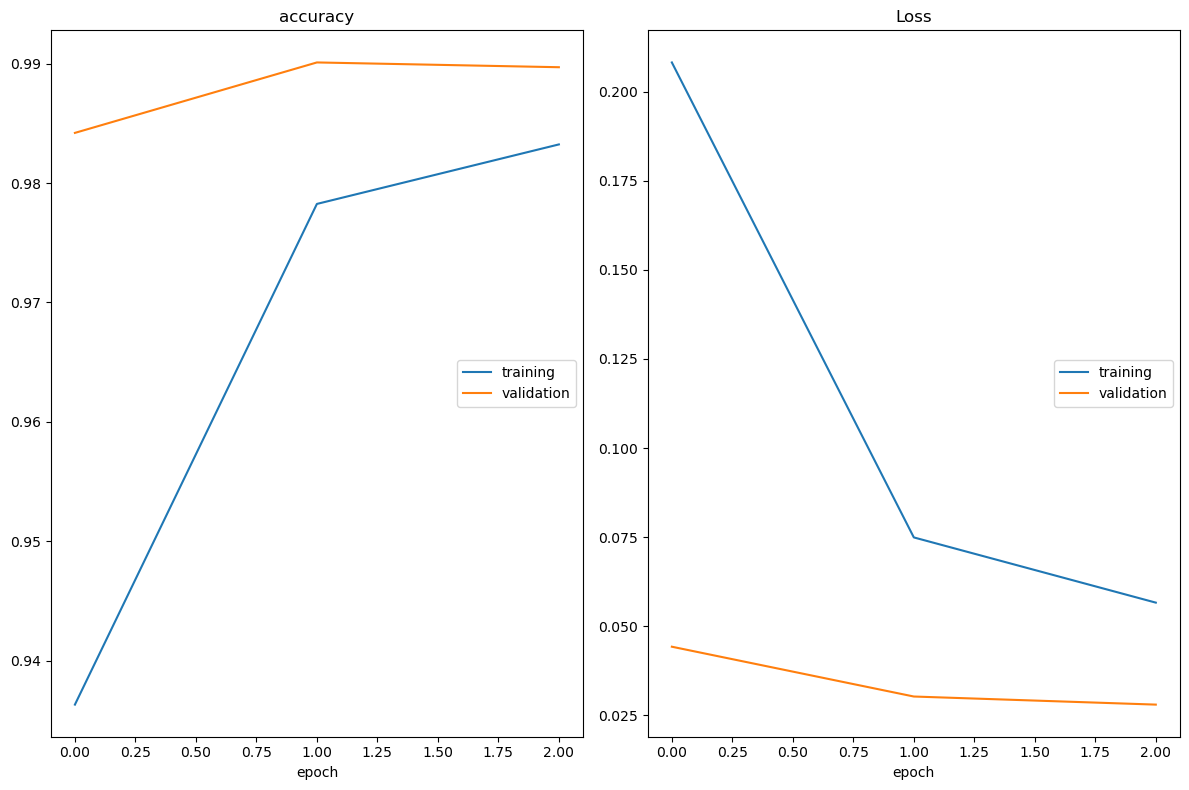

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0280 - val_accuracy: 0.9897
Epoch 4/6
1872/1875 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9859

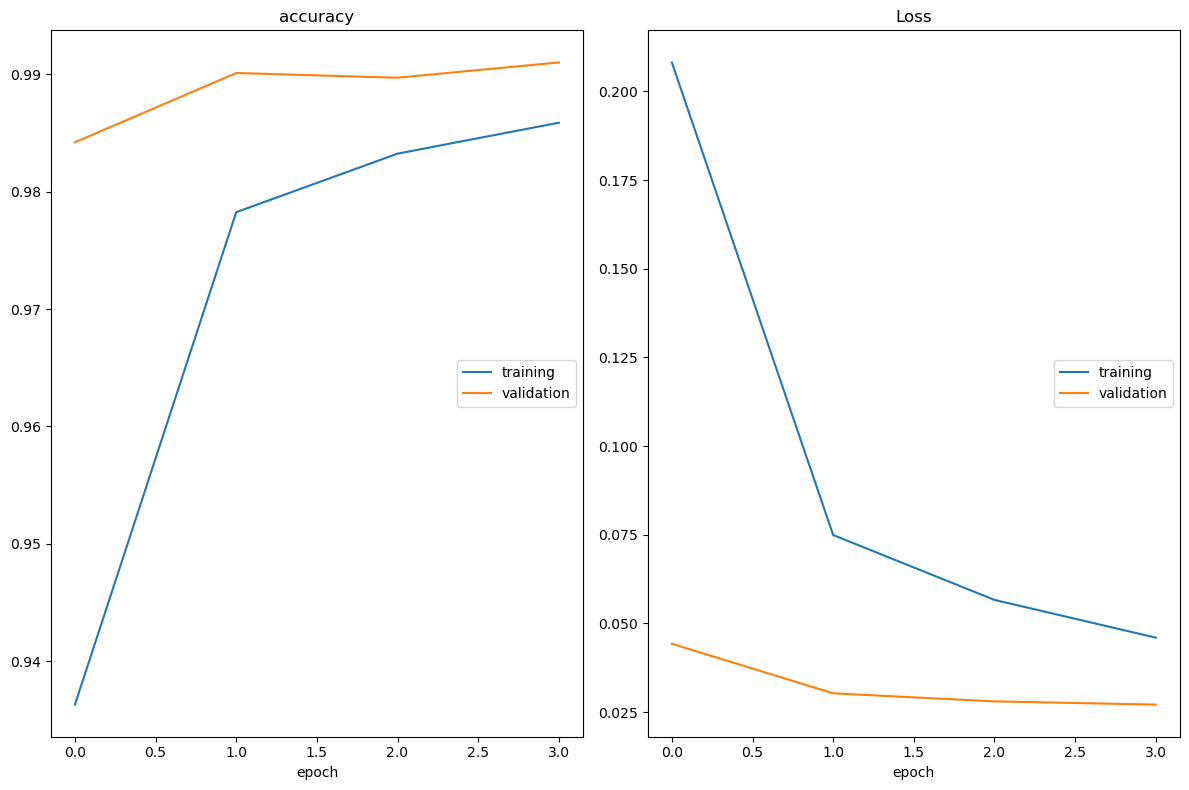

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0271 - val_accuracy: 0.9910
Epoch 5/6
1874/1875 [============================>.] - ETA: 0s - loss: 0.0369 - accuracy: 0.9885

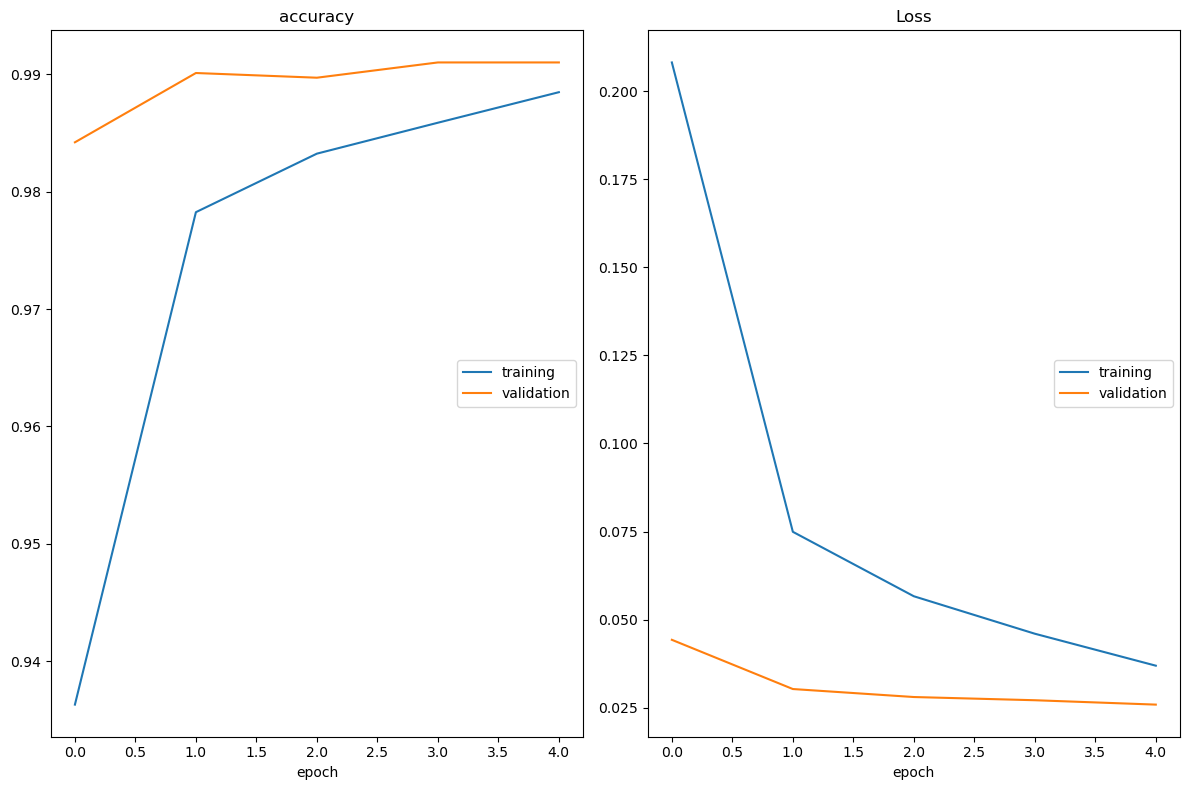

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0259 - val_accuracy: 0.9910
Epoch 6/6
1873/1875 [============================>.] - ETA: 0s - loss: 0.0326 - accuracy: 0.9894

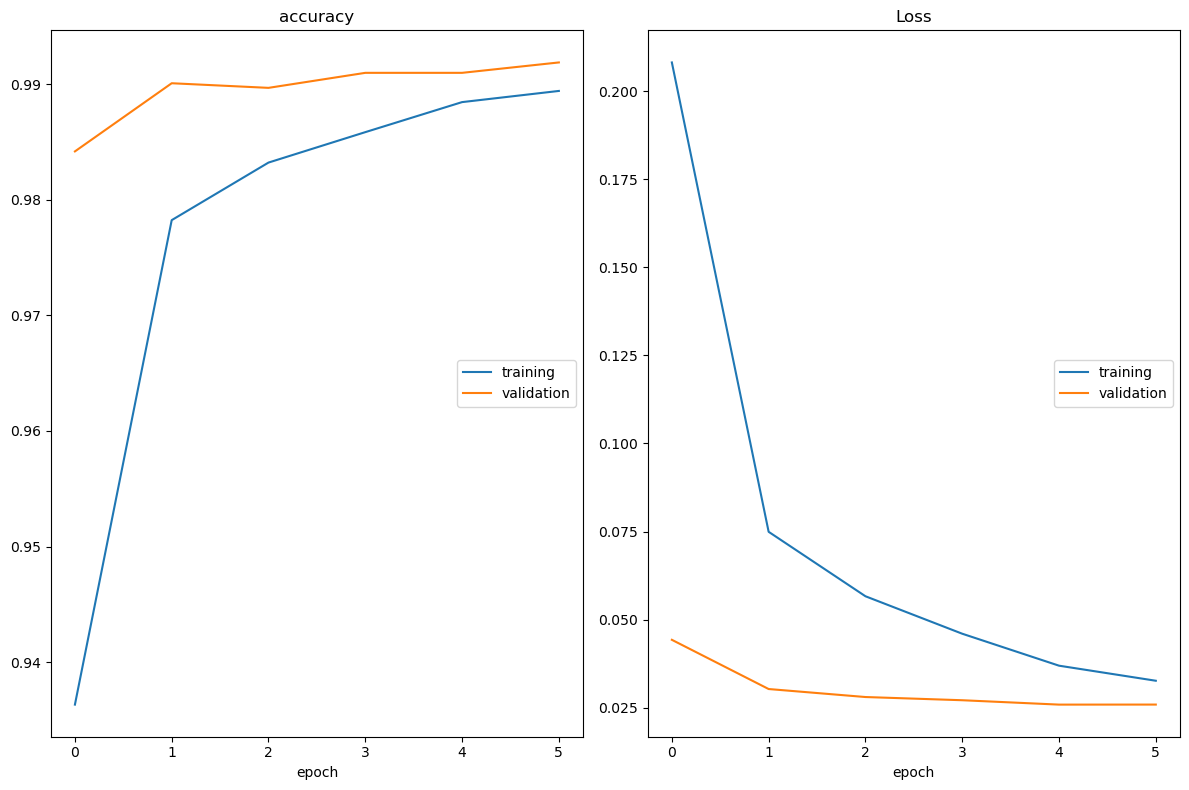

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0259 - val_accuracy: 0.9919


In [34]:
# ✅ 4. Train the model with all callbacks
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=6,
    batch_size=32,
    callbacks=[plot_losses2, early_stopping, checkpoint, tensorboard_callback]
)


In [35]:
# ✅ 5. Run TensorBoard (after training)
print("\nRun this command in terminal to start TensorBoard:\n")
print("tensorboard --logdir=logs")



Run this command in terminal to start TensorBoard:

tensorboard --logdir=logs


In [40]:
!tensorboard --logdir=logs

/bin/bash: line 1: tensorboard: command not found
